In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data1=pd.read_csv("bigdatamart_Train.csv")

In [3]:
data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data1.shape

(8523, 12)

In [5]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data1.skew()

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_39184\2517516131.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [7]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
data1['Item_Weight']=data1['Item_Weight'].fillna(data1['Item_Weight'].mean())

In [9]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data1['Outlet_Size'] = data1['Outlet_Size'].fillna(data1['Outlet_Size'].mode()[0])

In [11]:
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

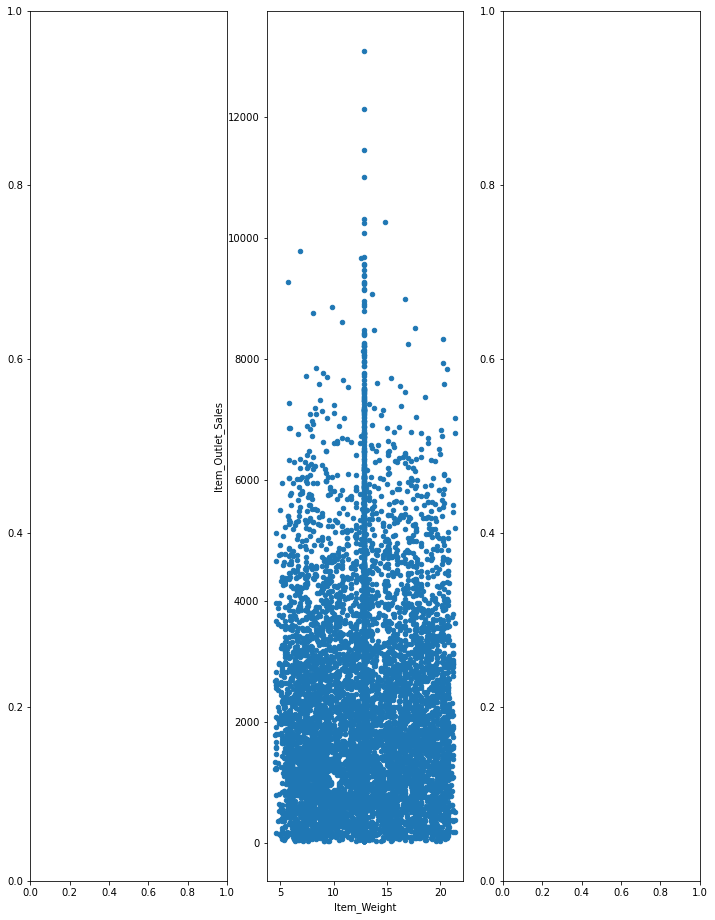

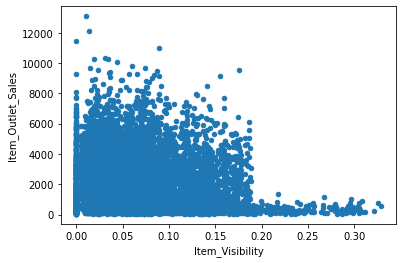

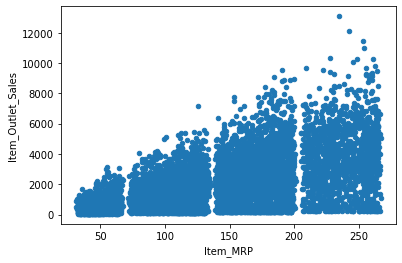

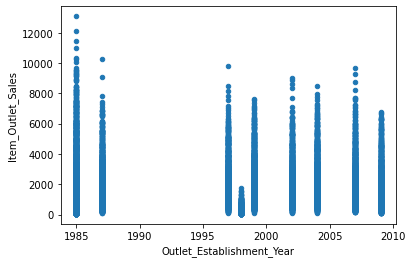

In [12]:
fig,axs=plt.subplots(1,3)
data1.plot(kind='scatter',x='Item_Weight',y='Item_Outlet_Sales',ax=axs[1],figsize=(12,16))
data1.plot(kind='scatter',x='Item_Visibility',y='Item_Outlet_Sales')
data1.plot(kind='scatter',x='Item_MRP',y='Item_Outlet_Sales')
data1.plot(kind='scatter',x='Outlet_Establishment_Year',y='Item_Outlet_Sales')

In [13]:
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

In [15]:
lab_enc=LabelEncoder()

In [16]:
data1['Item_Identifier']=lab_enc.fit_transform(data1['Item_Identifier'])
data1['Item_Fat_Content']=lab_enc.fit_transform(data1['Item_Fat_Content'])
data1['Item_Type']=lab_enc.fit_transform(data1['Item_Type'])
data1['Outlet_Identifier']=lab_enc.fit_transform(data1['Outlet_Identifier'])
data1['Outlet_Size']=lab_enc.fit_transform(data1['Outlet_Size'])
data1['Outlet_Location_Type']=lab_enc.fit_transform(data1['Outlet_Location_Type'])
data1['Outlet_Type']=lab_enc.fit_transform(data1['Outlet_Type'])

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

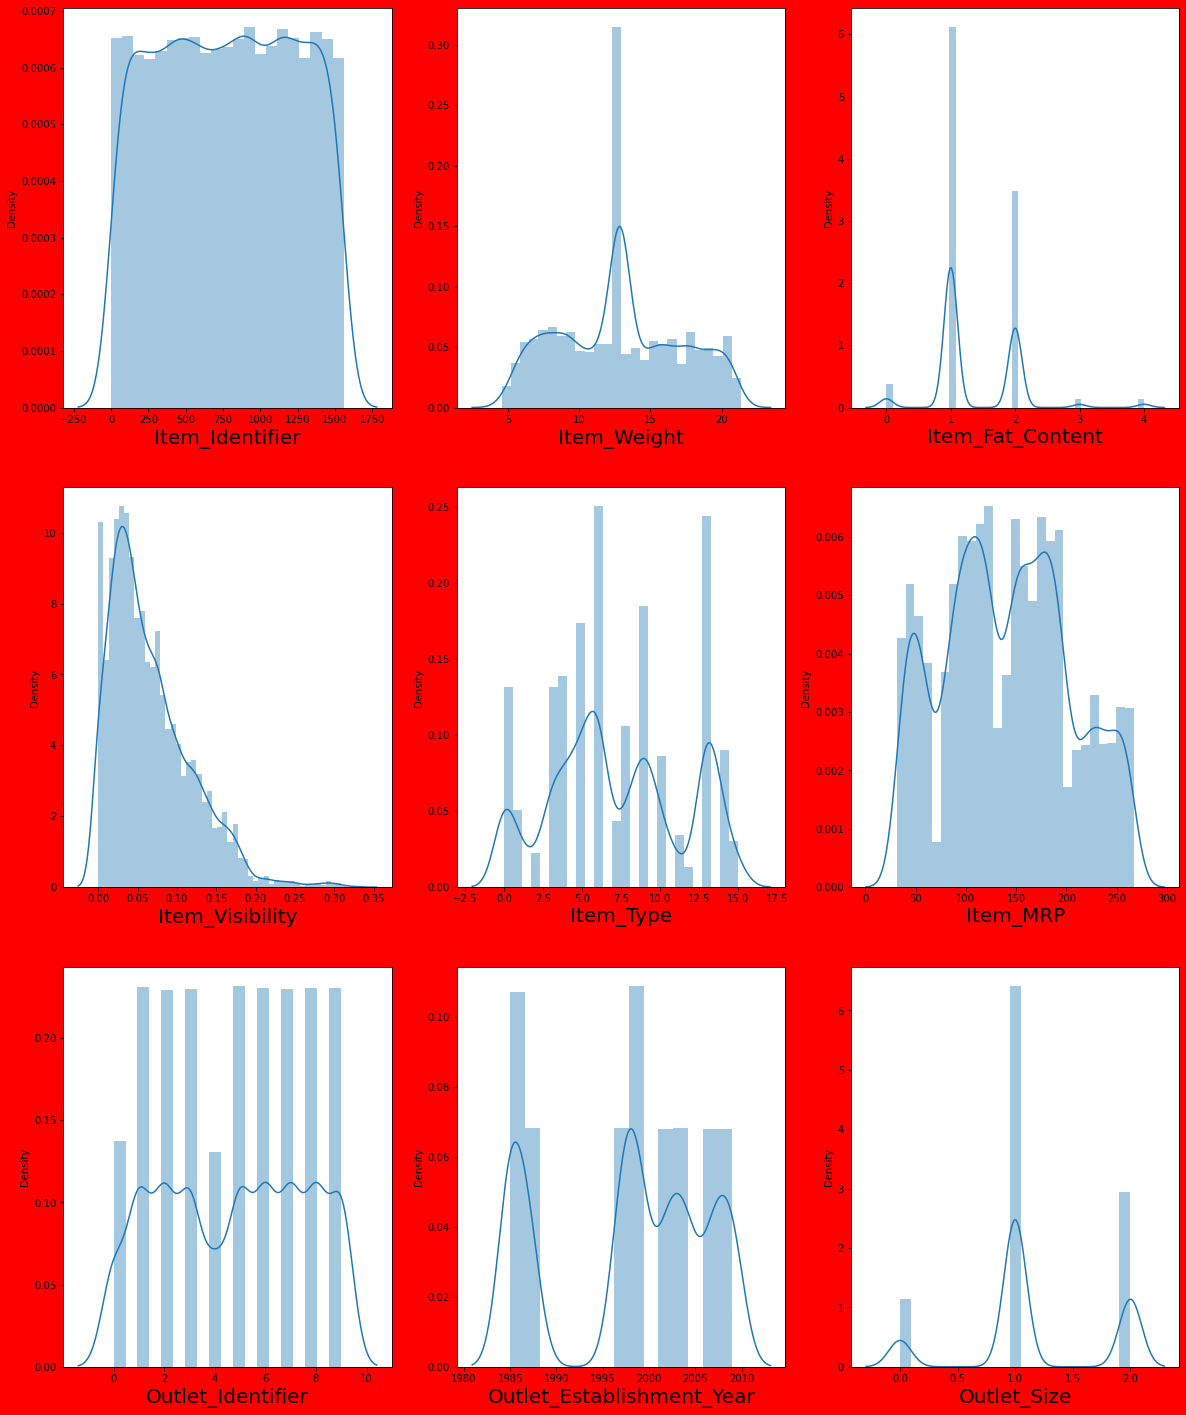

In [17]:
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1

for column in data1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [18]:
from scipy.stats import zscore

In [19]:
z_score=zscore(data1[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

In [20]:
abs_score=np.abs(z_score)
filtering_entry=(abs_score < 3).all(axis=1)

In [21]:
data1=data1[filtering_entry]

In [22]:
data1.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.00000,8428.000000
mean,779.993355,12.861218,1.369127,0.063905,7.227337,140.996015,4.750356,1997.911723,1.166469,1.115449,1.21476,2202.021401
std,449.735962,4.238141,0.644522,0.047302,4.207285,62.287713,2.832887,8.356697,0.599973,0.810126,0.79060,1704.631341
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.00000,33.290000
25%,395.000000,9.300000,1.000000,0.026861,4.000000,93.802150,2.000000,1987.000000,1.000000,0.000000,1.00000,862.876800
50%,783.000000,12.857645,1.000000,0.053293,6.000000,142.915400,5.000000,1999.000000,1.000000,1.000000,1.00000,1816.968200
75%,1168.000000,16.100000,2.000000,0.093160,10.000000,185.708200,7.000000,2004.000000,2.000000,2.000000,1.00000,3115.944000
max,1558.000000,21.350000,4.000000,0.220226,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.00000,13086.964800


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

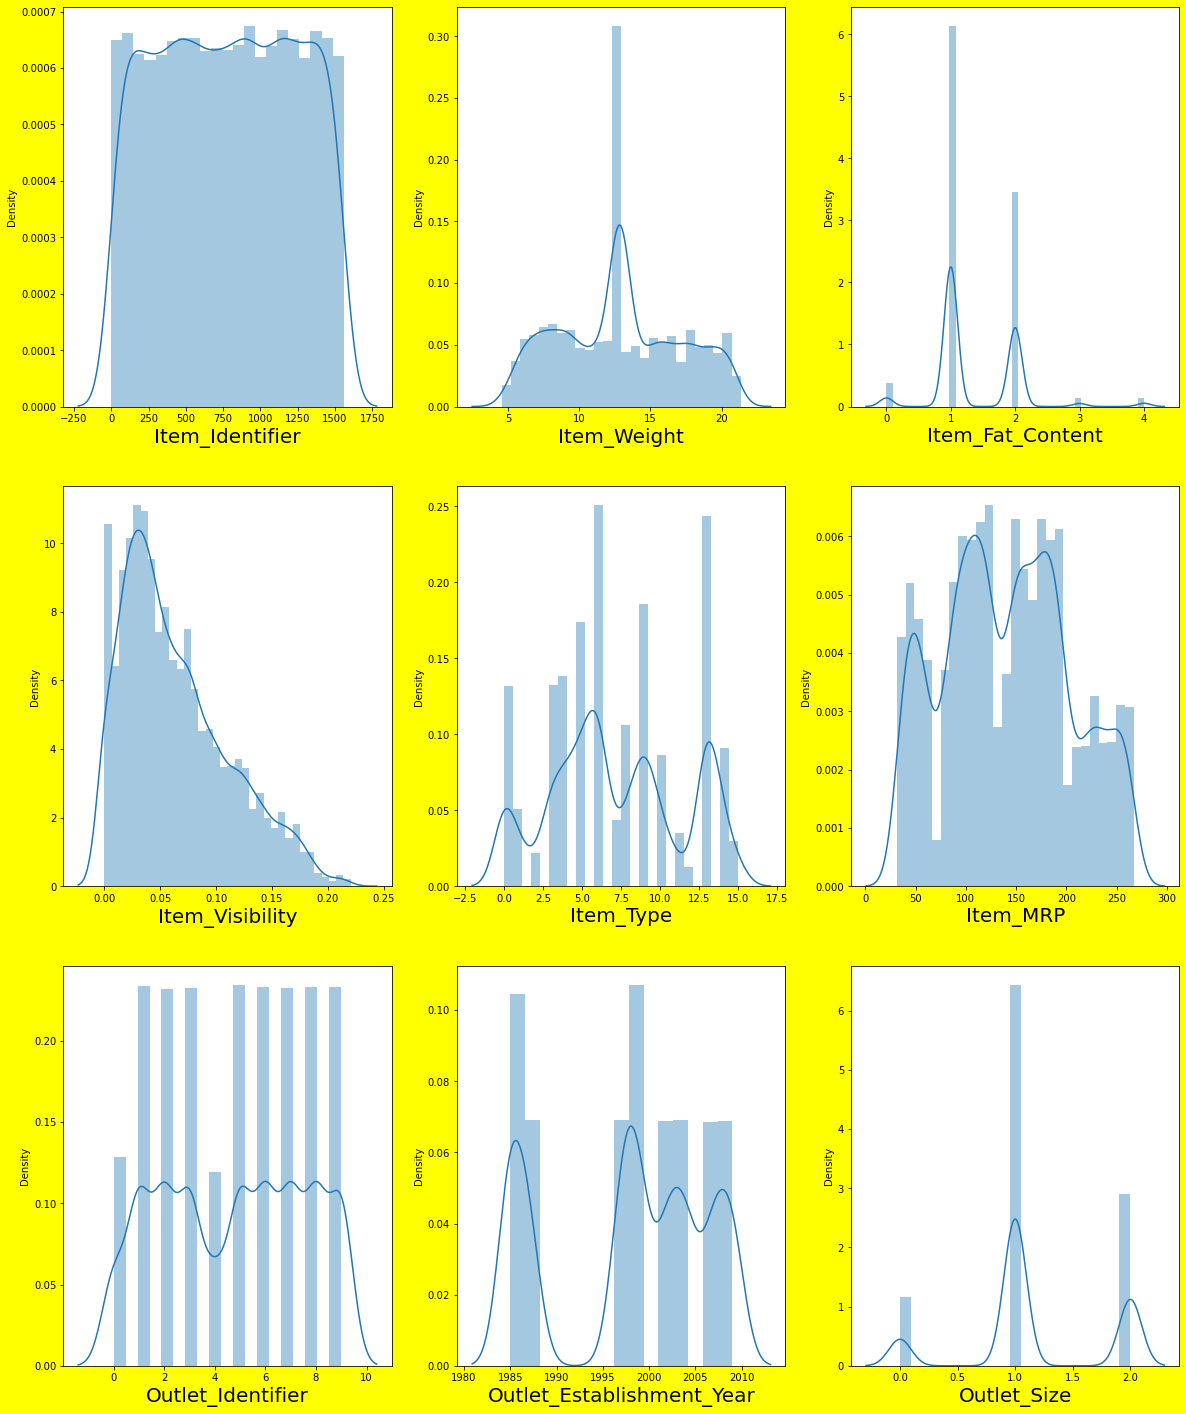

In [23]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber=1

for column in data1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [24]:
corr=data1.corr()

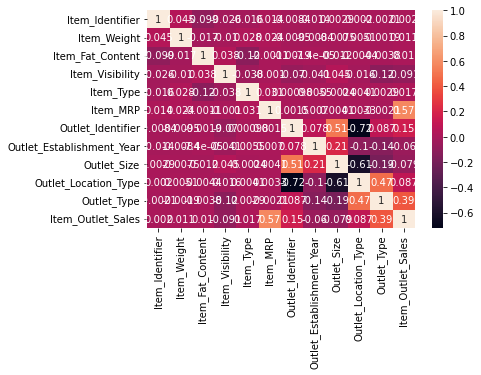

In [25]:
sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.show()

In [26]:
data1=data1.drop_duplicates()

In [27]:
data1.head(n=10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930000,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,2,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,2,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,1,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,2,0.016687,5,96.9726,7,2002,1,1,1,1076.5986
9,990,19.200000,2,0.094450,5,187.8214,2,2007,1,1,1,4710.5350


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

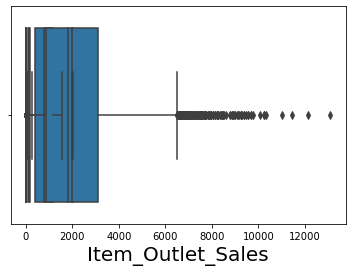

In [28]:
for column in data1:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(data1[column])
    plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

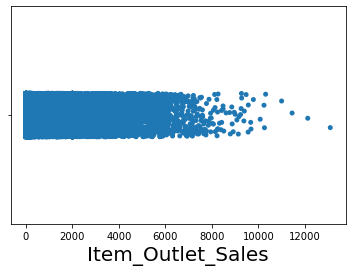

In [29]:
for column in data1:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
    sns.stripplot(data1[column])
    plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [30]:
X=data1.drop(columns=['Item_Outlet_Sales'])
y=data1['Item_Outlet_Sales']

In [31]:
scalar=StandardScaler()

In [32]:
X_scaled=scalar.fit_transform(X)

In [33]:
X_scaled.shape

(8428, 11)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.7,random_state=40)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
reg= RandomForestRegressor()

In [37]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
y_pred=reg.predict(x_test)

In [39]:
y_pred

array([ 665.440468, 3081.08937 ,  654.94746 , ..., 3359.080844,
       1531.233472, 1250.585456])

In [40]:
def metric_score(reg,X_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=reg.predict(X_train)
        print("Test R2 SCORE",r2_score(y_train,y_pred))
    
     
        
        
    elif train==False:
        pred=reg.predict(x_test)
        
        print("Accuracy Score:{accuracy_score(y_test,pred)* 100}")
        print("Test R2 SCORE",r2_score(y_test,pred))

In [41]:
metric_score(reg,x_train,x_test,y_train,y_test,train=True)
metric_score(reg,x_train,x_test,y_train,y_test,train=False)

Test R2 SCORE 0.9362412618445509
Accuracy Score:{accuracy_score(y_test,pred)* 100}
Test R2 SCORE 0.5438550427744371


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_param={'criterion':['squared_error','absolute_error','root_mean_squared_error'],'max_depth':[2,5],
            'min_samples_leaf':[2,10],
            'min_samples_split':[3,10],
            'max_leaf_nodes':[5,10]}

In [44]:
grid_search=GridSearchCV(estimator=reg,param_grid=grid_param,cv=5,n_jobs=-1)

In [45]:
grid_search.fit(x_train,y_train)

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\RIS

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'root_mean_squared_error'],
                         'max_depth': [2, 5], 'max_leaf_nodes': [5, 10],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [3, 10]})

In [46]:
from sklearn.metrics import mean_absolute_error

In [47]:
y_true='Item_Outlet_Sales'

In [62]:
mean_absolute_error(y_true, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [17, 5900]

In [49]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 3}

In [50]:
import pickle

In [57]:
loaded_model = pickle.load(open('reg_model','rb'))

In [68]:
a=loaded_model.predict(x_test)

In [69]:
a

array([ 655.939502, 3171.012318,  689.722194, ..., 4038.230134,
       1479.068042, 1394.05204 ])

In [70]:
y_test_pred=reg.predict(x_train)

In [71]:
y_test_pred

array([1870.218884,  498.757438, 4157.381702, ..., 4626.064954,
       3525.990246, 2042.448028])

In [ ]:
a=loaded_model.predict(scalar.transform(([[1870.21,498.757438]])))

In [75]:
pickle.dump(reg,open('reg_model_test','wb'))